# **New York City Yellow Taxi Data**

Submission by :- Pradeep S , AI-ML C72, 9738502777

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import warnings as w
w.filterwarnings('ignore')

In [4]:
# Install seaborn if not already installed

# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.267.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\pradeeps2\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
import os

# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files

# Select the folder having data files
os.chdir(r'C:\Users\pradeeps2\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        for date in monthly_data['date'].unique():
            date_data = monthly_data[monthly_data['date'] == date]
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                sample = hour_data.sample(frac=0.05, random_state=42)
                sampled_data = pd.concat([sampled_data, sample])

        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index




After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
df.to_parquet(r'C:\Users\pradeeps2\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\sampled_data_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [131]:
# Load the new data file

newdf = pd.read_parquet(r'C:\Users\pradeeps2\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\sampled_data_2023.parquet')
newdf.shape

(1991327, 22)

In [132]:
# df.head()
newdf.head(100)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
..       ...                  ...                   ...              ...   
95         2  2023-01-01 00:05:51   2023-01-01 00:27:07              2.0   
96         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
97         2  2023-01-01 00:38:56   2023-01-01 00:46:15              3.0   
98         2  2023-01-01 00:20:32   2023-01-01 00:46:17              1.0   
99         2  2023-01-01 00:24:36   2023-01-01 00:47:45              3.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            7.74         1.0                  N           138           256   
1            1.24         1.0                  N           161           237   
2            1.44         1.0                  N           237           141   
3            0.54         1.0                  N           143           142   
4           19.24         NaN               None            66           107   
..            ...         ...                ...           ...           ...   
95           3.61         1.0                  N           144           141   
96           4.13         1.0                  N            79           236   
97           0.90         1.0                  N           236           262   
98           4.76         1.0                  N           107           238   
99           9.79         4.0                  N           132           265   

    payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0              2  ...      0.5        0.00           0.0   
1              1  ...      0.5        2.58           0.0   
2              2  ...      0.5        0.00           0.0   
3              2  ...      0.5        0.00           0.0   
4              0  ...      0.5        5.93           0.0   
..           ...  ...      ...         ...           ...   
95             2  ...      0.5        0.00           0.0   
96             1  ...      0.5        4.96           0.0   
97             1  ...      0.5        3.00           0.0   
98             1  ...      0.5        6.50           0.0   
99             4  ...      0.5        0.00           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                     1.0         41.15                   0.0         1.25   
1                     1.0         15.48                   2.5         0.00   
2                     1.0         16.40                   2.5         0.00   
3                     1.0         11.50                   2.5         0.00   
4                     1.0         35.57                   NaN          NaN   
..                    ...           ...                   ...          ...   
95                    1.0         26.20                   2.5         0.00   
96                    1.0         29.76                   2.5         0.00   
97                    1.0         16.60                   2.5         0.00   
98                    1.0         39.00                   2.5         0.00   
99                    1.0         61.35                   0.0         1.25   

          date  hour Airport_fee  
0   2023-01-01     0         NaN  
1   2023-01-01     0         NaN  
2   2023-01-01     0         NaN  
3   2023-01-01     0         NaN  
4   2023-01-01     0         NaN  
..         ...   ...         ...  
95  2023-01-01     0         NaN  
96  2023-01-01     0         NaN  
97  2023-01-01     0         NaN  
98  2023-01-01     0         NaN  
99  2023-01-01     0         NaN  

[100 rows x 22 columns]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [133]:
# Fix the index and drop any columns that are not needed

newdf.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [141]:

null_airport_fee_count = newdf['airport_fee'].isnull().sum()
null_Airport_fee_count = newdf['Airport_fee'].isnull().sum()
print(f"Null values in airport_fee: {null_airport_fee_count}")
print(f"Null values in Airport_fee: {null_Airport_fee_count}")

# Drop the column with more null values
newdf.airport_fee.value_counts()

Null values in airport_fee: 68132
Null values in Airport_fee: 224036


airport_fee
 0.00    1754288
 1.75     127197
 1.25      41692
-1.75         13
-1.25          4
 1.00          1
Name: count, dtype: int64

In [140]:
# Combine the two airport fee columns 
newdf['airport_fee'] = newdf['airport_fee'].combine_first(newdf['Airport_fee'])


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [142]:
# check where values of fare amount are negative

newdf[newdf['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee]
Index: []

[0 rows x 22 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [143]:
# Analyse RatecodeID for the negative fare amounts
newdf[newdf['fare_amount'] < 0]['RatecodeID'].value_counts()


Series([], Name: count, dtype: int64)

In [88]:
# Find which columns have negative values

# check airpoty_fee column
#newdf[newdf['airport_fee'] < 0] #yes
# check congestion_surcharge column
#newdf[newdf['congestion_surcharge'] < 0]    #yes
# check fare_amount column
#newdf[newdf['fare_amount'] < 0] #no
# check improvement_surcharge column
#newdf[newdf['improvement_surcharge'] < 0] #yes
# check mta_tax column
#newdf[newdf['mta_tax'] < 0] #yes
# check tip_amount column
#newdf[newdf['tip_amount'] < 0] #no
# check tolls_amount column
#newdf[newdf['tolls_amount'] < 0] #no
# check total_amount column
#newdf[newdf['total_amount'] < 0] #yes
# check trip_distance column
#newdf[newdf['trip_distance'] < 0] #no
# check extra column
#newdf[newdf['extra'] < 0] #yes
# check payment_type column
#newdf[newdf['payment_type'] < 0] #no
#check passenger_count column
#newdf[newdf['passenger_count'] <= 0] #yes =0
# check RatecodeID column
#newdf[newdf['RatecodeID'] < 0] #no

# Remove the rows with negative values in the columns




In [144]:
# fix these negative values

newdf = newdf[newdf['airport_fee'] >= 0]
newdf = newdf[newdf['congestion_surcharge'] >= 0]
newdf = newdf[newdf['improvement_surcharge'] >= 0]
newdf = newdf[newdf['mta_tax'] >= 0]
newdf = newdf[newdf['total_amount'] >= 0]
newdf = newdf[newdf['extra'] >= 0]
newdf = newdf[newdf['passenger_count'] > 0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [145]:
# Find the proportion of missing values in each column
newdf.isna().mean() * 100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
date                     0.000000
hour                     0.000000
Airport_fee              8.095311
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [165]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
#newdf['passenger_count'].isnull().sum()
#newdf[newdf['passenger_count'].isna()]
newdf['passenger_count'].fillna(newdf['passenger_count'].mode()[0], inplace=True)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [167]:
# Fix missing values in 'RatecodeID'
#newdf['RatecodeID'].isnull().sum()
newdf['RatecodeID'].fillna(newdf['RatecodeID'].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [169]:
# handle null values in congestion_surcharge
#newdf['congestion_surcharge'].isnull().sum()
newdf['congestion_surcharge'].fillna(newdf['congestion_surcharge'].mode()[0], inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [170]:
# Handle any remaining missing values
# find the columns with missing values
newdf.isna().mean() * 100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
date                     0.000000
hour                     0.000000
Airport_fee              8.095311
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [171]:
# remove passenger_count > 6
newdf =  newdf[newdf['passenger_count'] <= 6]

In [184]:
#newdf[ (newdf['PULocationID'] != newdf['DOLocationID'])  & (newdf['trip_distance'] == 0) & (newdf['fare_amount']  == 0 )]
# drop the above rows
newdf = newdf[~((newdf['PULocationID'] != newdf['DOLocationID'])  & (newdf['trip_distance'] == 0) & (newdf['fare_amount']  == 0 ))]

In [177]:
# check and remove  payment_type 0
newdf[newdf['payment_type'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee]
Index: []

[0 rows x 22 columns]

In [172]:
# Continue with outlier handling
# remove trip_distance > 250
newdf =  newdf[newdf['trip_distance'] <= 250]   



In [187]:
#newdf[(newdf['trip_distance'] < 0.50) & (newdf['fare_amount'] > 300)] 35 rows in this category

newdf = newdf[~((newdf['trip_distance'] < 0.50) & (newdf['fare_amount'] > 300))]

In [188]:
# Do any columns need standardising?

newdf.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    1880911
Y      10831
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [190]:
newdf.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [522]:
# Find and show the hourly trends in taxi pickups
newdf['pickuphour'] = newdf['tpep_pickup_datetime'].dt.hour
newdf.groupby('pickuphour')['pickuphour'].value_counts().plot(kind='line', figsize=(15, 6))
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the day')
plt.xticks(range(0, 24))
plt.ylabel('Number of pickups')
plt.show()

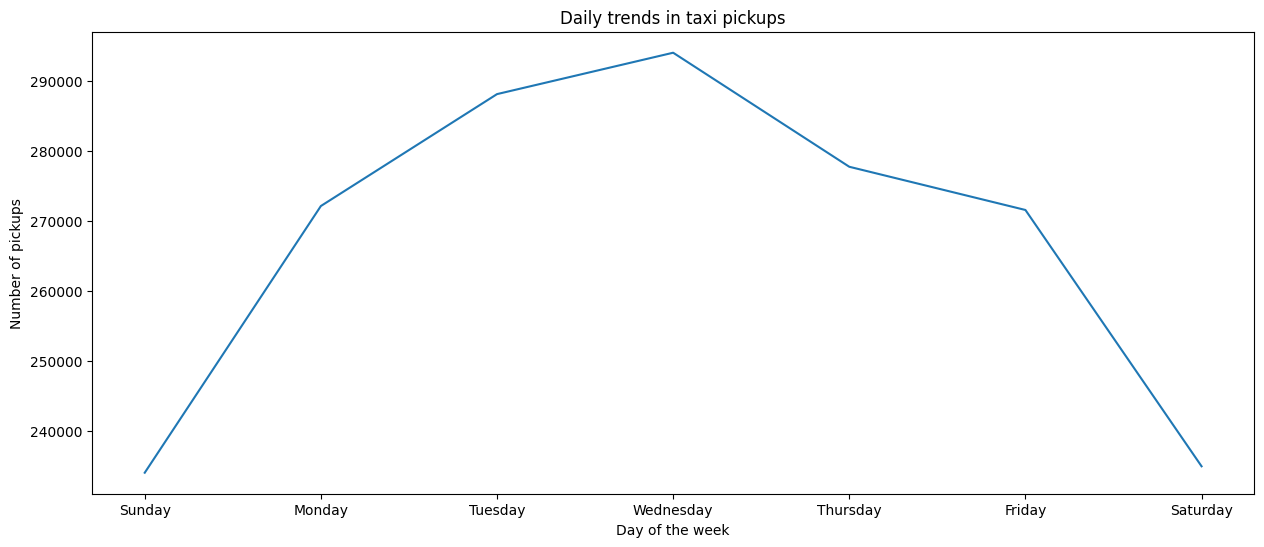

In [526]:
# Find and show the daily trends in taxi pickups (days of the week)

newdf['daysofweek'] = newdf['tpep_pickup_datetime'].dt.dayofweek
newdf.groupby('daysofweek')['daysofweek'].value_counts().plot(kind='line', figsize=(15, 6))
plt.xlabel('Day of the week')
plt.ylabel('Number of pickups')
plt.title('Daily trends in taxi pickups')
plt.xticks(range(0, 7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

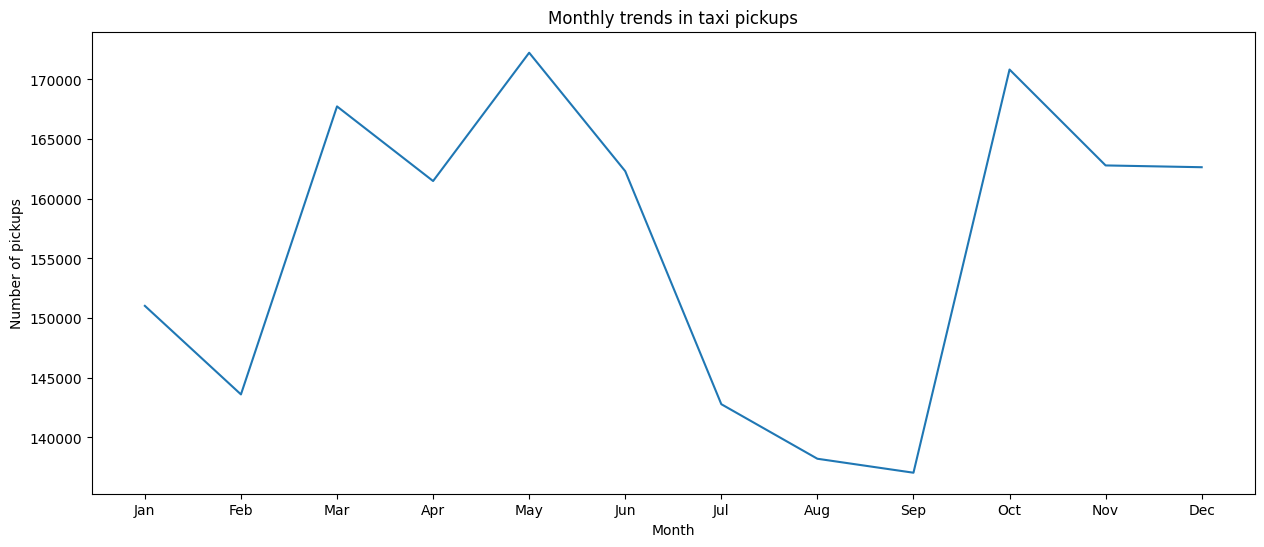

In [498]:
# Show the monthly trends in pickups

newdf['pickupmonth'] = newdf['tpep_pickup_datetime'].dt.month
newdf.groupby('pickupmonth')['pickupmonth'].value_counts().plot(kind='line', figsize=(15, 6))
plt.xlabel('Month')
plt.ylabel('Number of pickups')
plt.title('Monthly trends in taxi pickups')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [214]:
# Analyse the above parameters
newdf[newdf['tip_amount']< 0 ]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee, pickuphour, daysofweek, pickupmonth]
Index: []

[0 rows x 25 columns]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [213]:
# Create a df with non zero entries for the selected parameters.

newdf = newdf[newdf['total_amount'] >= 0]  
newdf = newdf[newdf['fare_amount'] >= 0]    
newdf = newdf[newdf['trip_distance'] >= 0]



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

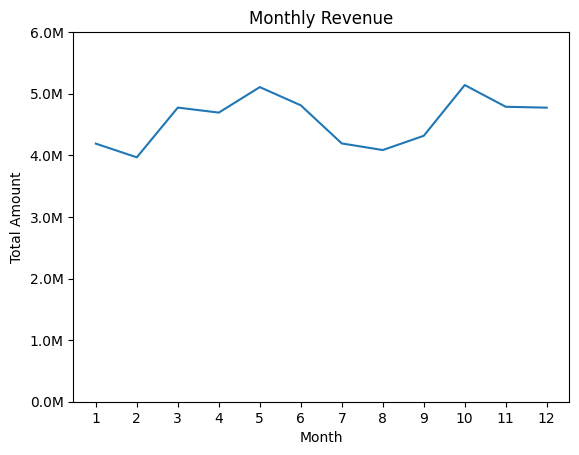

In [241]:
# Group data by month and analyse monthly revenue

import matplotlib.ticker as mtick
sumbymonth = newdf.groupby('pickupmonth')['total_amount'].sum()
sumbymonth
# sumbymonth.plot(kind='line', figsize=(15, 6))   
# plt.xlabel('Month')
# plt.ylabel('Total Amount')

sns.lineplot(x=sumbymonth.index, y=sumbymonth.values).set(title='Monthly Revenue', xlabel='Month', ylabel='Total Amount', xticks=range(1, 13),yticks=range(0, 7000000, 1000000))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

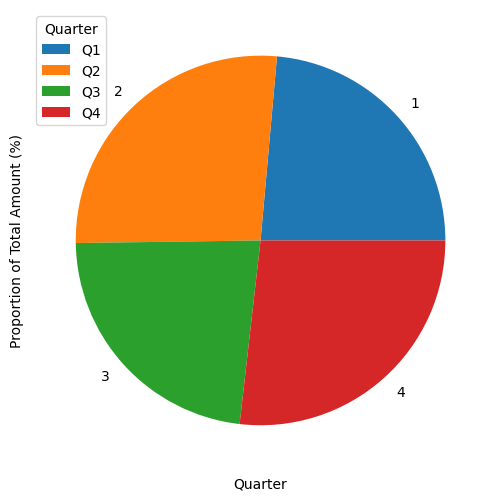

In [285]:
# Calculate proportion of each quarter
newdf['pickupquarter'] = newdf['tpep_pickup_datetime'].dt.quarter
quarterly_proportion = newdf.groupby('pickupquarter')['total_amount'].sum() / newdf['total_amount'].sum() * 100
quarterly_proportion.plot(kind='pie', figsize=(15, 6))
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Amount (%)')
plt.legend(title='Quarter', labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: >

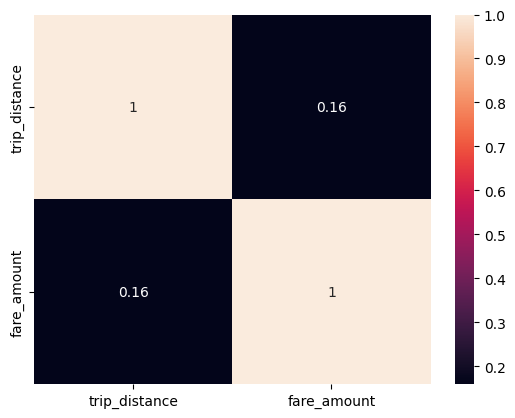

In [266]:
# Show how trip fare is affected by distance

nonzero_distance = newdf[newdf['trip_distance'] > 0]    
nonzero_distance_fare_corr = nonzero_distance[['trip_distance', 'fare_amount']].corr()
sns.heatmap(nonzero_distance_fare_corr, annot=True)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

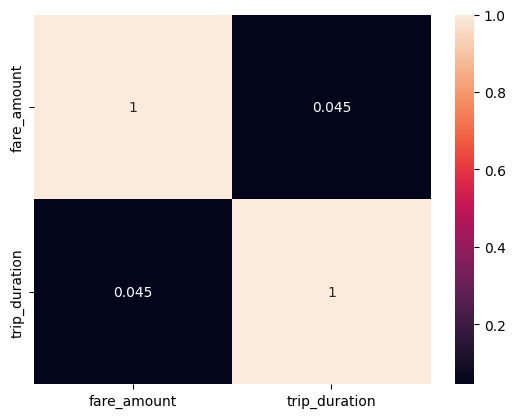

In [527]:
# Show relationship between fare and trip duration
newdf['trip_duration']  = round((newdf['tpep_dropoff_datetime'] - newdf['tpep_pickup_datetime']).dt.total_seconds() / 60)

fare_duration_corr = newdf[['fare_amount', 'trip_duration']].corr() 
sns.heatmap(fare_duration_corr, annot=True)
plt.show()

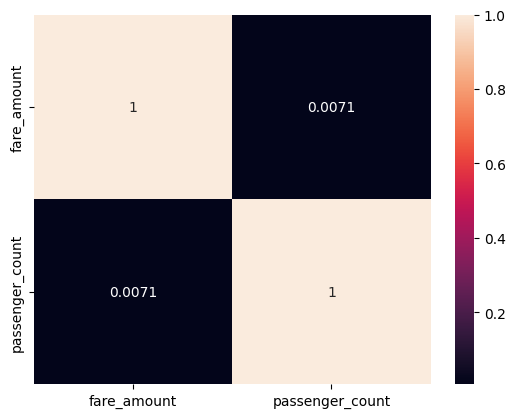

In [528]:
# Show relationship between fare and number of passengers
fare_passenger_corr = newdf[['fare_amount', 'passenger_count']].corr()
sns.heatmap(fare_passenger_corr, annot=True)
plt.show()


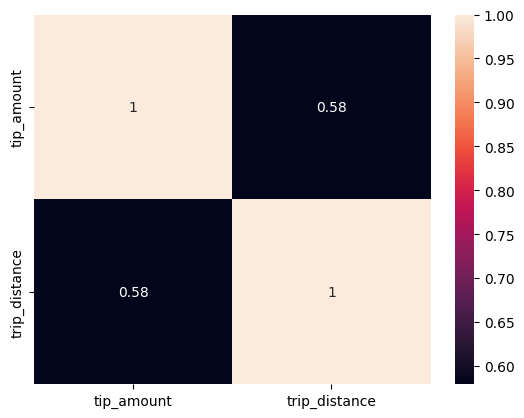

In [529]:
# Show relationship between tip and trip distance
tip_tripdistance_corr = newdf[['tip_amount', 'trip_distance']].corr()
sns.heatmap(tip_tripdistance_corr, annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [288]:
# Analyse the distribution of different payment types (payment_type).

sns.barplot(x=newdf['payment_type'].value_counts().index, y=newdf['payment_type'].value_counts().values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [296]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\pradeeps2\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
 7   count_x     255 non-null    float64 
 8   count_y     255 non-null    float64 
dtypes: float64(4), geometry(1), int32(2), object(2)
memory usage: 16.6+ KB
None


<Axes: >

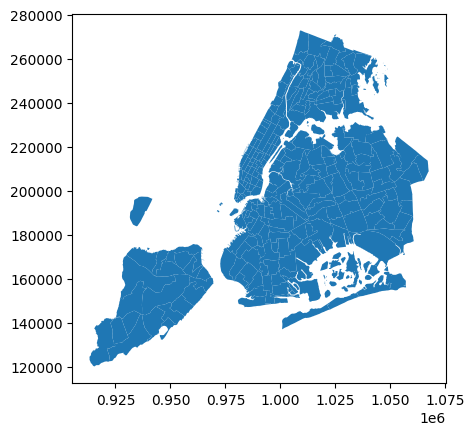

In [488]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [301]:
# Merge zones and trip records using locationID and PULocationID
newdf= newdf.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
134             2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
246             2  2023-01-01 01:12:36   2023-01-01 01:34:29              1.0   
365             2  2023-01-01 01:52:44   2023-01-01 02:03:46              1.0   
382             2  2023-01-01 01:50:52   2023-01-01 02:10:14              1.0   
...           ...                  ...                   ...              ...   
1872596         2  2023-09-29 15:27:10   2023-09-29 16:38:01              1.0   
1872604         2  2023-09-29 15:10:57   2023-09-29 16:35:32              2.0   
1872613         2  2023-09-29 16:02:56   2023-09-29 17:07:36              2.0   
1872705         2  2023-09-29 22:22:57   2023-09-29 22:46:19              2.0   
1872718         2  2023-09-29 23:57:02   2023-09-30 00:14:50              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
134               9.98         1.0                  N           138   
246              11.45         1.0                  N           138   
365               3.72         1.0                  N           138   
382              11.39         1.0                  N           138   
...                ...         ...                ...           ...   
1872596           9.89         1.0                  N           138   
1872604          10.32         1.0                  N           138   
1872613           9.86         1.0                  N           138   
1872705           9.46         1.0                  N           138   
1872718          10.19         1.0                  N           138   

         DOLocationID  payment_type  ...  pickupmonth  pickupquarter  \
0                 256             2  ...            1              1   
134                97             1  ...            1              1   
246               243             2  ...            1              1   
365                92             1  ...            1              1   
382                32             2  ...            1              1   
...               ...           ...  ...          ...            ...   
1872596            43             1  ...            9              3   
1872604           230             2  ...            9              3   
1872613           239             1  ...            9              3   
1872705            48             1  ...            9              3   
1872718           263             1  ...            9              3   

         trip_duration  OBJECTID  Shape_Leng  Shape_Area               zone  \
0                 16.0       138    0.107467    0.000537  LaGuardia Airport   
134               14.0       138    0.107467    0.000537  LaGuardia Airport   
246               22.0       138    0.107467    0.000537  LaGuardia Airport   
365               11.0       138    0.107467    0.000537  LaGuardia Airport   
382               19.0       138    0.107467    0.000537  LaGuardia Airport   
...                ...       ...         ...         ...                ...   
1872596           71.0       138    0.107467    0.000537  LaGuardia Airport   
1872604           85.0       138    0.107467    0.000537  LaGuardia Airport   
1872613           65.0       138    0.107467    0.000537  LaGuardia Airport   
1872705           23.0       138    0.107467    0.000537  LaGuardia Airport   
1872718           18.0       138    0.107467    0.000537  LaGuardia Airport   

         LocationID  borough  \
0               138   Queens   
134             138   Queens   
246             138   Queens   
365             138   Queens   
382             138   Queens   
...             ...      ...   
1872596         138   Queens   
1872604         138   Queens   
1872613         138   Queens   
1872705         138   Queens   
1872718         1

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [315]:
# Group data by location and calculate the number of trips

trips_by_location = newdf.groupby('LocationID')['LocationID'].value_counts()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [317]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_by_location, left_on='LocationID', right_on='LocationID', how='left')
zones.head(50)


OBJECTID  Shape_Leng  Shape_Area                                 zone  \
0          1    0.116357    0.000782                       Newark Airport   
1          2    0.433470    0.004866                          Jamaica Bay   
2          3    0.084341    0.000314              Allerton/Pelham Gardens   
3          4    0.043567    0.000112                        Alphabet City   
4          5    0.092146    0.000498                        Arden Heights   
5          6    0.150491    0.000606              Arrochar/Fort Wadsworth   
6          7    0.107417    0.000390                              Astoria   
7          8    0.027591    0.000027                         Astoria Park   
8          9    0.099784    0.000338                           Auburndale   
9         10    0.099839    0.000436                         Baisley Park   
10        11    0.079211    0.000265                           Bath Beach   
11        12    0.036661    0.000042                         Battery Park   
12        13    0.050281    0.000149                    Battery Park City   
13        14    0.175214    0.001382                            Bay Ridge   
14        15    0.144336    0.000925              Bay Terrace/Fort Totten   
15        16    0.141292    0.000872                              Bayside   
16        17    0.093523    0.000323                              Bedford   
17        18    0.069800    0.000149                         Bedford Park   
18        19    0.101825    0.000547                            Bellerose   
19        20    0.051440    0.000135                              Belmont   
20        21    0.115974    0.000380                     Bensonhurst East   
21        22    0.126170    0.000472                     Bensonhurst West   
22        23    0.290556    0.002196              Bloomfield/Emerson Hill   
23        24    0.047000    0.000061                         Bloomingdale   
24        25    0.047146    0.000124                          Boerum Hill   
25        26    0.123548    0.000534                         Borough Park   
26        27    0.202509    0.001341  Breezy Point/Fort Tilden/Riis Beach   
27        28    0.097961    0.000291              Briarwood/Jamaica Hills   
28        29    0.071408    0.000202                       Brighton Beach   
29        30    0.094510    0.000146                        Broad Channel   
30        31    0.096425    0.000334                           Bronx Park   
31        32    0.054267    0.000151                            Bronxdale   
32        33    0.053270    0.000147                     Brooklyn Heights   
33        34    0.065706    0.000174                   Brooklyn Navy Yard   
34        35    0.085788    0.000324                          Brownsville   
35        36    0.087051    0.000248                       Bushwick North   
36        37    0.142810    0.000452                       Bushwick South   
37        38    0.083218    0.000327                      Cambria Heights   
38        39    0.132370    0.000900                             Canarsie   
39        40    0.051851    0.000109                      Carroll Gardens   
40        41    0.052793    0.000143                       Central Harlem   
41        42    0.092709    0.000264                 Central Harlem North   
42        43    0.099739    0.000380                         Central Park   
43        44    0.235689    0.001945               Charleston/Tottenville   
44        45    0.045907    0.000091                            Chinatown   
45        46    0.134475    0.000926                          City Island   
46        47    0.089828    0.000163                   Claremont/Bathgate   
47        48    0.043747    0.000094                         Clinton East   
48        49    0.075290    0.000203                         Clinton Hill   
49        50    0.055748    0.000173                         Clinton West   

    LocationID        borough  \
0            1            EWR   
1         

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

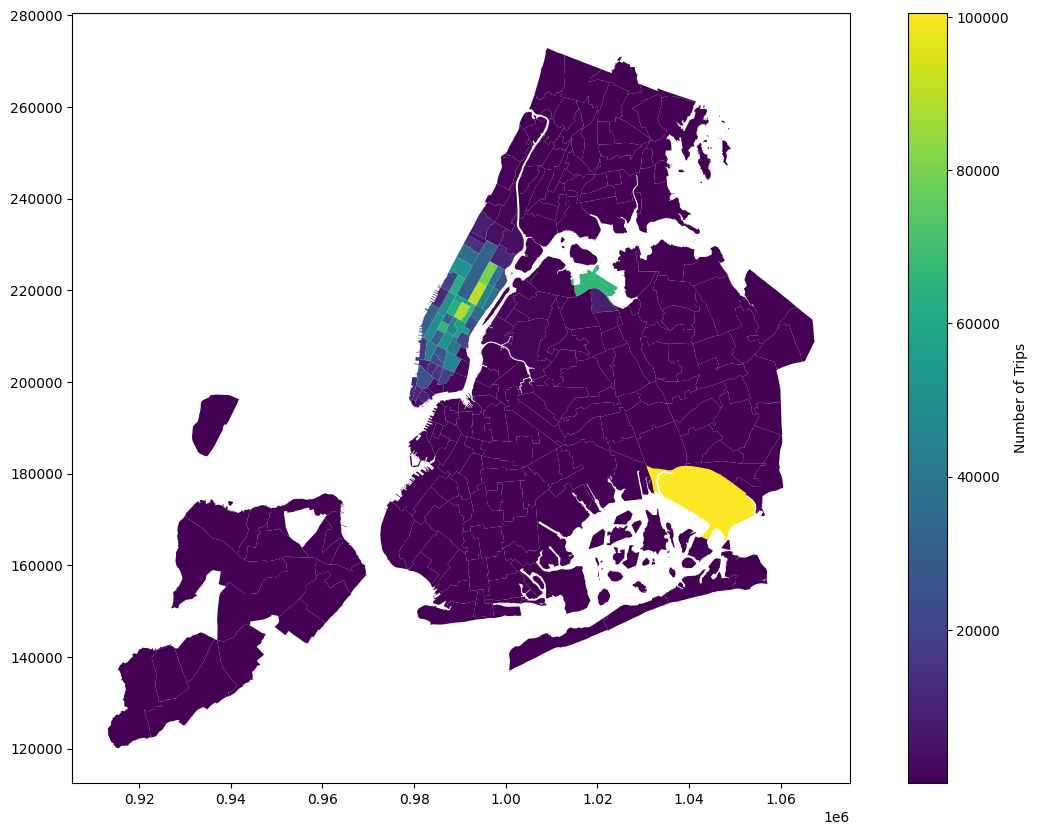

In [323]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map and display it
zones.plot(column='count_x', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Number of Trips"})


In [324]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by='count_x', ascending=True).head(50)


OBJECTID  Shape_Leng  Shape_Area                                 zone  \
108       109    0.178268    0.001170                          Great Kills   
110       111    0.059931    0.000209                  Green-Wood Cemetery   
114       115    0.116169    0.000373                  Grymes Hill/Clifton   
83         84    0.233624    0.002074    Eltingville/Annadale/Prince's Bay   
220       221    0.166218    0.000890                            Stapleton   
171       172    0.118476    0.000658               New Dorp/Midland Beach   
1           2    0.433470    0.004866                          Jamaica Bay   
26         27    0.202509    0.001341  Breezy Point/Fort Tilden/Riis Beach   
186       187    0.126868    0.000421                        Port Richmond   
198       199    0.077809    0.000289                        Rikers Island   
58         59    0.037795    0.000063                         Crotona Park   
183       184    0.260816    0.001989                      Pelham Bay Park   
117       118    0.243966    0.001827          Heartland Village/Todt Hill   
252       253    0.036051    0.000078                        Willets Point   
250       251    0.137711    0.000626                          Westerleigh   
57         58    0.059855    0.000205                         Country Club   
155       156    0.144477    0.001052                      Mariners Harbor   
45         46    0.134475    0.000926                          City Island   
95         96    0.185180    0.000548            Forest Park/Highland Park   
205       206    0.212757    0.000944            Saint George/New Brighton   
203       204    0.101912    0.000641                    Rossville/Woodrow   
127       128    0.070209    0.000207                     Inwood Hill Park   
7           8    0.027591    0.000027                         Astoria Park   
239       240    0.146070    0.000722                   Van Cortlandt Park   
119       120    0.083261    0.000093                      Highbridge Park   
213       214    0.135300    0.000812             South Beach/Dongan Hills   
30         31    0.096425    0.000334                           Bronx Park   
4           5    0.092146    0.000498                        Arden Heights   
63         64    0.184452    0.001058                           Douglaston   
182       183    0.039826    0.000095                           Pelham Bay   
152       153    0.024737    0.000032                          Marble Hill   
177       178    0.068253    0.000176                  Ocean Parkway South   
72         73    0.085302    0.000292                        East Flushing   
43         44    0.235689    0.001945               Charleston/Tottenville   
14         15    0.144336    0.000925              Bay Terrace/Fort Totten   
153       154    0.227332    0.001790      Marine Park/Floyd Bennett Field   
100       101    0.101710    0.000452                            Glen Oaks   
251       252    0.158004    0.001025                           Whitestone   
149       150    0.089331    0.000333                      Manhattan Beach   
33         34    0.065706    0.000174                   Brooklyn Navy Yard   
8           9    0.099784    0.000338                           Auburndale   
191       192    0.111965    0.000374                      Queensboro Hill   
226       227    0.082830    0.000268                     Sunset Park East   
19         20    0.051440    0.000135                              Belmont   
5           6    0.150491    0.000606              Arrochar/Fort Wadsworth   
53         54    0.076219    0.000132                      Columbia Street   
256       257    0.058669    0.000139                      Windsor Terrace   
15         16    0.141292    0.000872                              Bayside   
10         11    0.079211    0.000265                           Bath Beach   
200       201    0.130404    0.000619                        Rockaway Park   

     LocationID        bor

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [352]:
# Find routes which have the slowest speeds at different times of the day
newdf.head()
newdf.columns.tolist()
#newdf[newdf['pickuphour'] == 0]['trip_duration'].describe()
newdf['avg_trip_per_hr'] =  round(newdf.groupby('pickuphour').agg({'trip_duration': 'mean'}))
newdf['speed']  = newdf['trip_distance'] / (newdf['avg_trip_per_hr'] )
newdf.head().sort_values(by='speed', ascending=False)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
4           7.10         1.0                  N           246            37   
2           1.44         1.0                  N           237           141   
1           1.24         1.0                  N           161           237   
3           0.54         1.0                  N           143           142   

   payment_type  ...  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0             2  ...           16.0       138    0.107467    0.000537   
4             1  ...           34.0       246    0.069467    0.000281   
2             2  ...           11.0       237    0.042213    0.000096   
1             1  ...            5.0       161    0.035804    0.000072   
3             2  ...            5.0       143    0.054180    0.000151   

                        zone  LocationID    borough  \
0          LaGuardia Airport         138     Queens   
4  West Chelsea/Hudson Yards         246  Manhattan   
2      Upper East Side South         237  Manhattan   
1             Midtown Center         161  Manhattan   
3        Lincoln Square West         143  Manhattan   

                                            geometry  avg_trip_per_hr  \
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...             16.0   
4  POLYGON ((983031.177 217138.506, 983640.32 216...             16.0   
2  POLYGON ((993633.442 216961.016, 993507.232 21...             14.0   
1  POLYGON ((991081.026 214453.698, 990952.644 21...             15.0   
3  POLYGON ((989338.1 223572.253, 989368.225 2235...             14.0   

      speed  
0  0.483750  
4  0.443750  
2  0.102857  
1  0.082667  
3  0.038571  

[5 rows x 36 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [351]:
# Visualise the number of trips per hour and find the busiest hour

sns.barplot(x=newdf['pickuphour'].value_counts().index, y=newdf['pickuphour'].value_counts().values)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')

Text(0.5, 1.0, 'Number of Trips per Hour')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [358]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
scaled_trips = newdf['pickuphour'].value_counts().head(5)/ sample_fraction
scaled_trips.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Hour')  
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour (Scaled)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [530]:
# Compare traffic trends for the week days and weekends
newdf['dayofweek'] = newdf['tpep_pickup_datetime'].dt.dayofweek


# Create a new column to indicate if the day is a weekday or weekend
newdf['weekend'] = newdf['dayofweek'].apply(lambda x: 1 if x > 4 else 0)

# Group data by hour and day type
hourly_traffic = newdf.groupby(['pickuphour', 'weekend']).size().unstack()
hourly_traffic.plot(kind='line', figsize=(15, 6))
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Traffic Trends for Weekdays and Weekends')
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

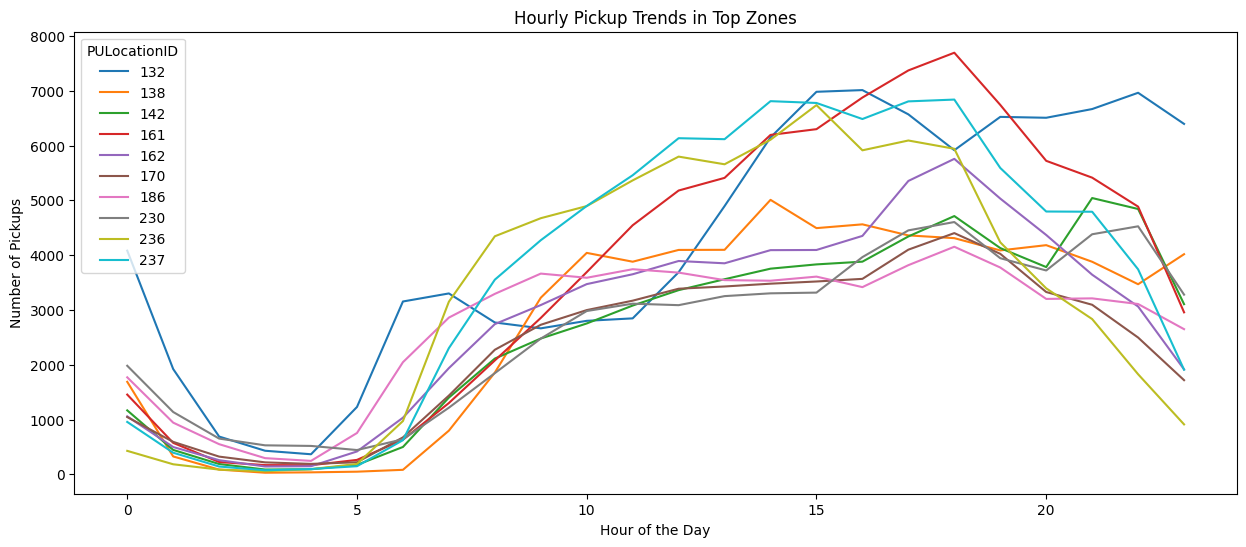

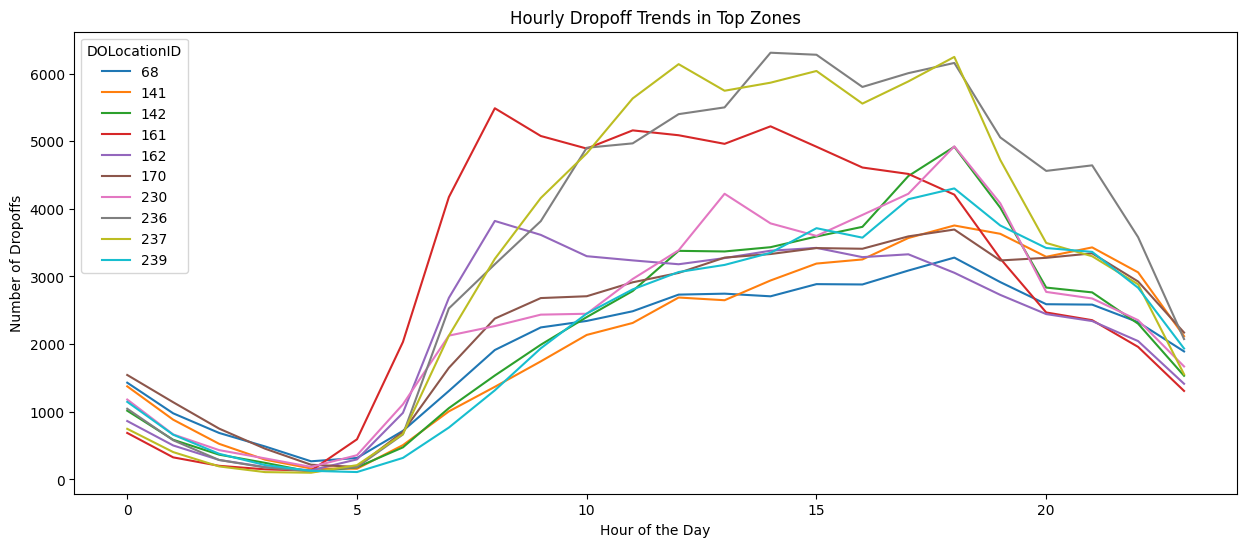

In [395]:
# Identify top 10 zones with high hourly pickups
top_pickup_zones = newdf.groupby('PULocationID')['PULocationID'].count().nlargest(10)
top_pickup_zones = top_pickup_zones.index.tolist()

# Identify top 10 zones with high hourly dropoffs
top_dropoff_zones = newdf.groupby('DOLocationID')['DOLocationID'].count().nlargest(10)
top_dropoff_zones = top_dropoff_zones.index.tolist()

# Filter data for top pickup and dropoff zones
top_zones_data = newdf[(newdf['PULocationID'].isin(top_pickup_zones)) | (newdf['DOLocationID'].isin(top_dropoff_zones))]

# Show pickup trends in top zones
pickup_trends = top_zones_data[top_zones_data['PULocationID'].isin(top_pickup_zones)]
pickup_trends = pickup_trends.groupby(['PULocationID', 'pickuphour']).size().unstack().T
pickup_trends.plot(kind='line', figsize=(15, 6), title='Hourly Pickup Trends in Top Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Show dropoff trends in top zones
dropoff_trends = top_zones_data[top_zones_data['DOLocationID'].isin(top_dropoff_zones)]
dropoff_trends = dropoff_trends.groupby(['DOLocationID', 'pickuphour']).size().unstack().T
dropoff_trends.plot(kind='line', figsize=(15, 6), title='Hourly Dropoff Trends in Top Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [399]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
newdf['pickup_dropoff_ratio'] = newdf['PULocationID'] / newdf['DOLocationID']
newdf['dropoff_pickup_ratio'] = newdf['DOLocationID'] / newdf['PULocationID']
highest_pickup = newdf['pickup_dropoff_ratio'].nlargest(10)
lowest_pickup = newdf['pickup_dropoff_ratio'].nsmallest(10)
highest_dropoff = newdf['dropoff_pickup_ratio'].nlargest(10)
lowest_dropoff = newdf['dropoff_pickup_ratio'].nsmallest(10)

# Display the results
print('Top 10 Pickup/Dropoff Ratios:')
print(highest_pickup)       
print('\nBottom 10 Pickup/Dropoff Ratios:')
print(lowest_pickup)
print('\nTop 10 Dropoff/Pickup Ratios:')
print(highest_dropoff)
print('\nBottom 10 Dropoff/Pickup Ratios:')
print(lowest_dropoff)


Top 10 Pickup/Dropoff Ratios:
2304      263.0
3761      263.0
131853    263.0
217146    263.0
222875    263.0
293868    263.0
297561    263.0
572077    263.0
575257    263.0
614592    263.0
Name: pickup_dropoff_ratio, dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
672273     0.003774
920265     0.003774
1466022    0.003774
1466392    0.003774
1646609    0.003774
55068      0.003788
337973     0.003788
644552     0.003788
728250     0.003788
868276     0.003788
Name: pickup_dropoff_ratio, dtype: float64

Top 10 Dropoff/Pickup Ratios:
672273     265.0
920265     265.0
1466022    265.0
1466392    265.0
1646609    265.0
55068      264.0
337973     264.0
644552     264.0
728250     264.0
868276     264.0
Name: dropoff_pickup_ratio, dtype: float64

Bottom 10 Dropoff/Pickup Ratios:
2304      0.003802
3761      0.003802
131853    0.003802
217146    0.003802
222875    0.003802
293868    0.003802
297561    0.003802
572077    0.003802
575257    0.003802
614592    0.003802
Name: dropoff_pickup_r

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [542]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

newdf['night_hours'] = newdf['pickuphour'].apply(lambda x: 1 if x >= 23 or x < 5 else 0)    
night_data = newdf[newdf['night_hours'] == 1]

# Find top 10 pickup zones during night hours
top_night_pickup_zones = night_data.groupby('PULocationID')['PULocationID'].count().nlargest(10)
top_night_pickup_zones = top_night_pickup_zones.index.tolist()

# Find top 10 dropoff zones during night hours
top_night_dropoff_zones = night_data.groupby('DOLocationID')['DOLocationID'].count().nlargest(10)
top_night_dropoff_zones = top_night_dropoff_zones.index.tolist()

len(top_night_pickup_zones), len(top_night_dropoff_zones)
top_dropoff_zones, top_pickup_zones
#newdf[newdf['LocationID'] == 236].head()
# Display the results
print('Top 10 Pickup Zones During Night Hours:')
print(newdf[newdf['PULocationID'].isin(top_night_pickup_zones)]['zone'].unique())
print('\nTop 10 Dropoff Zones During Night Hours:')
print(newdf[newdf['DOLocationID'].isin(top_night_dropoff_zones)]['zone'].unique())


Top 10 Pickup Zones During Night Hours:
['LaGuardia Airport' 'East Village' 'JFK Airport' 'Lower East Side'
 'Midtown South' 'Clinton East' 'West Village' 'Greenwich Village South'
 'Penn Station/Madison Sq West' 'Times Sq/Theatre District']

Top 10 Dropoff Zones During Night Hours:
['Upper East Side South' 'Flatiron' 'Lincoln Square East'
 'Sutton Place/Turtle Bay North' 'Murray Hill'
 'Meatpacking/West Village West' 'Clinton East' 'Midtown East'
 'Upper West Side North' 'Greenwich Village South' 'Union Sq'
 'Little Italy/NoLiTa' 'Penn Station/Madison Sq West'
 'Two Bridges/Seward Park' 'West Village' 'East Village'
 'Long Island City/Queens Plaza' 'Yorkville West' 'Lenox Hill West'
 'Clinton West' 'West Chelsea/Hudson Yards' 'Gramercy'
 'TriBeCa/Civic Center' 'Lower East Side' 'Midtown Center'
 'Upper West Side South' 'UN/Turtle Bay South' 'Prospect Heights'
 'Stuy Town/Peter Cooper Village' 'East Chelsea'
 'Financial District South' 'Upper East Side North' 'Bloomingdale'
 'Williamsb

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [407]:
# Filter for night hours (11 PM to 5 AM)
night_data_new = newdf[newdf['night_hours'] == 1]


# Find the revenue share for nighttime and daytime hours.
night_revenue = night_data_new['total_amount'].sum()

day_revenue = newdf[newdf['night_hours'] == 0]['total_amount'].sum()

night_revenue_share = night_revenue / newdf['total_amount'].sum() * 100

day_revenue_share = day_revenue / newdf['total_amount'].sum() * 100

# Display the results
print(f"Night Revenue: ${night_revenue:.2f}")
print(f"Day Revenue: ${day_revenue:.2f}")
print(f"Night Revenue Share: {night_revenue_share:.2f}%")
print(f"Day Revenue Share: {day_revenue_share:.2f}%")



Night Revenue: $6142632.58
Day Revenue: $48041207.06
Night Revenue Share: 11.34%
Day Revenue Share: 88.66%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [545]:
# Analyse the fare per mile per passenger for different passenger counts
non_zero_trip_distance =  newdf[newdf['trip_distance'] != 0] 
non_zero_passenger_count =  non_zero_trip_distance[non_zero_trip_distance['passenger_count'] != 0]

non_zero_passenger_count['fare_per_mile_per_passenger'] = non_zero_passenger_count['fare_amount'] / (non_zero_passenger_count['trip_distance'] * non_zero_passenger_count['passenger_count'])
non_zero_passenger_count['fare_per_mile_per_passenger'].plot(kind='box',figsize=(15, 6))
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

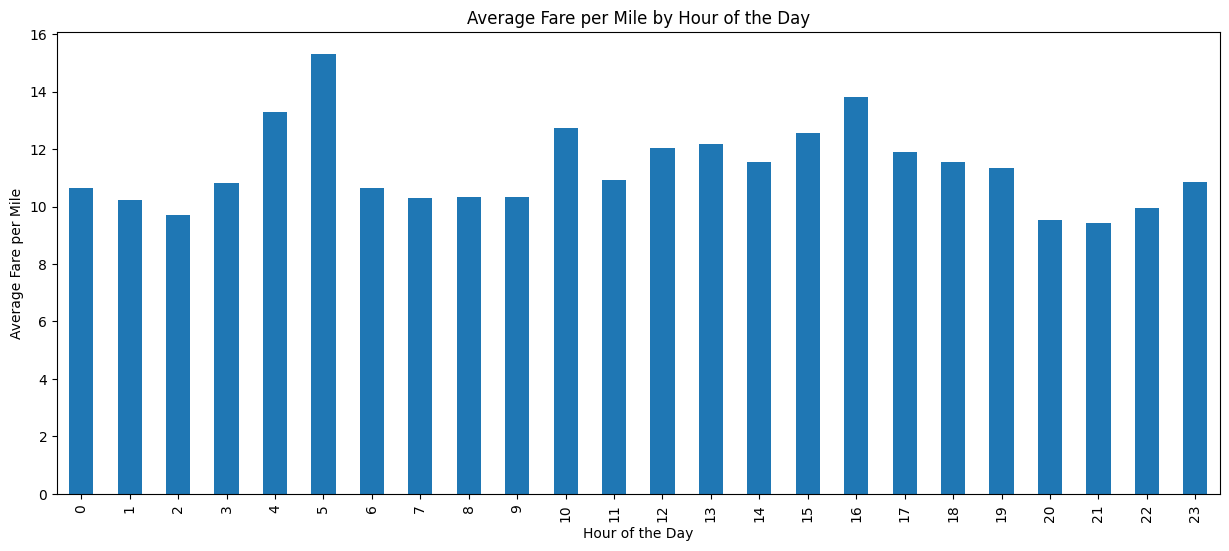

In [546]:
# Compare the average fare per mile for different days and for different times of the day

non_zero_trip_distance['fare_per_mile'] = non_zero_trip_distance['fare_amount'] / non_zero_trip_distance['trip_distance'] 

fare_per_mile_by_day = non_zero_trip_distance.groupby('dayofweek')['fare_per_mile']
fare_per_mile_by_hour = non_zero_trip_distance.groupby('pickuphour')['fare_per_mile']
# # Display the results
fare_per_mile_by_day.mean().plot(kind='bar', figsize=(15, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Day of the Week')
plt.show()

fare_per_mile_by_hour.mean().plot(kind='bar', figsize=(15, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Hour of the Day')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

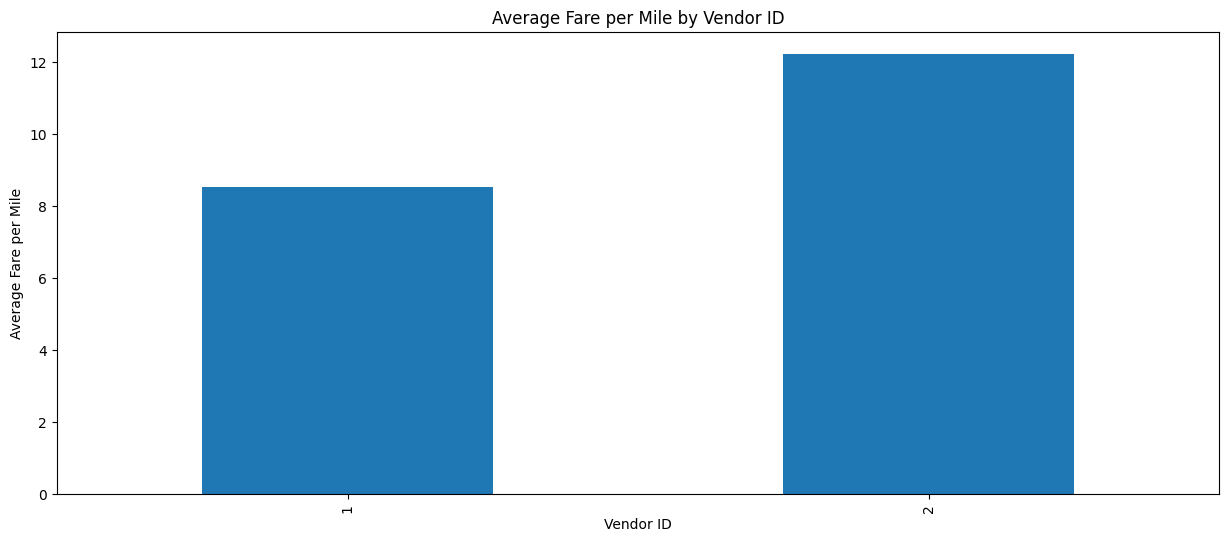

In [547]:
# Compare fare per mile for different vendors
newdf['VendorID'].isna().sum()


fare_per_mile_by_vendor = non_zero_trip_distance.groupby('VendorID')['fare_per_mile'].mean()
fare_per_mile_by_vendor.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<Axes: xlabel='distance_tier'>

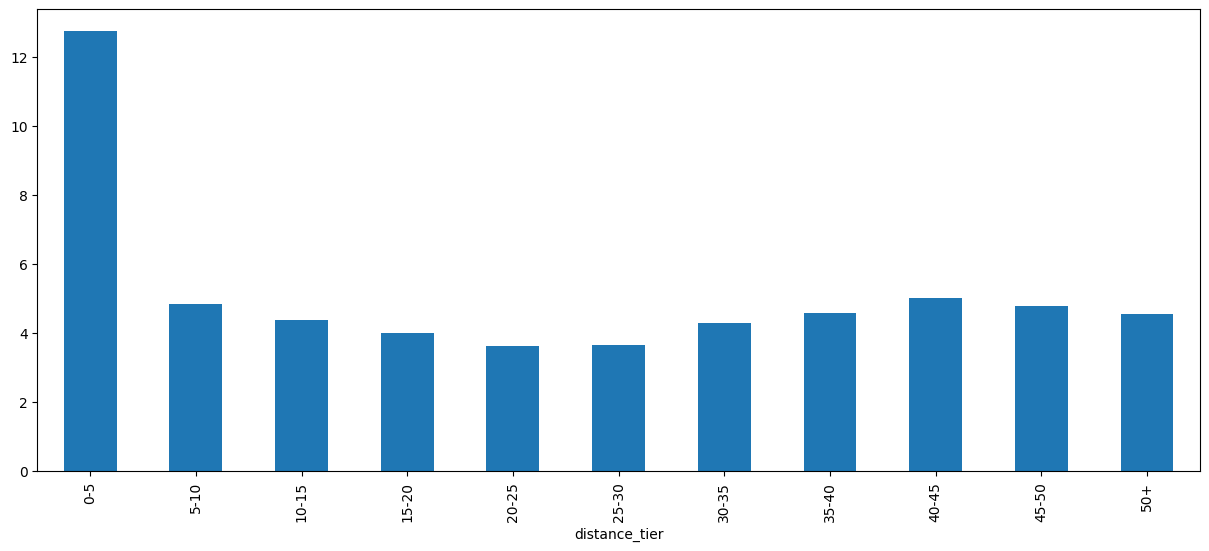

In [440]:
# Defining distance tiers

non_zero_trip_distance['distance_tier'] = pd.cut(non_zero_trip_distance['trip_distance'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+'])

# Group data by distance tier and calculate the average fare per mile
fare_per_mile_by_distance_tier = non_zero_trip_distance.groupby('distance_tier')['fare_per_mile'].mean()
fare_per_mile_by_distance_tier.plot(kind='bar', figsize=(15, 6))


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [452]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
newdf['tip_percentage'] = newdf['tip_amount'] / newdf['total_amount'] * 100

tip_tripdistance_passengercount_corr = newdf[['tip_amount', 'trip_distance','passenger_count','trip_duration','fare_amount','pickuphour']].corr()
sns.heatmap(tip_tripdistance_passengercount_corr, annot=True)


<Axes: >

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

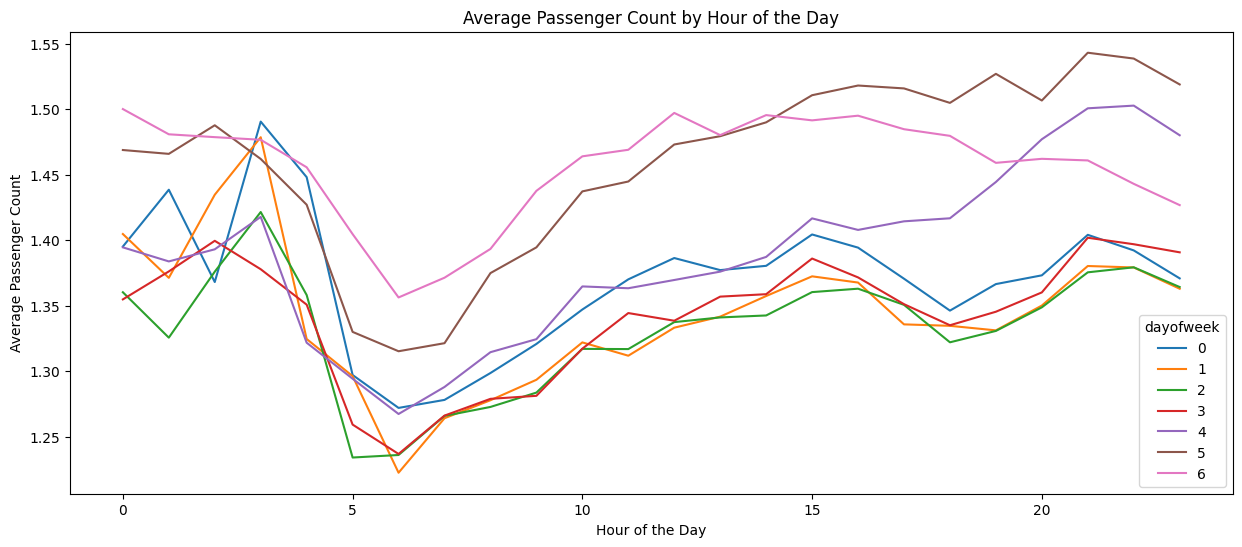

In [548]:
# See how passenger count varies across hours and days
newdf.groupby(['pickuphour', 'dayofweek'])['passenger_count'].mean().unstack().plot(kind='line', figsize=(15, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [549]:
# How does passenger count vary across zones
newdf.zone.value_counts()
newdf.groupby('zone')['passenger_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15, 6))
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Zone')
plt.show()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  count_x  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    222.0   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...      2.0   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...     41.0   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   1910.0   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...     13.0   

   count_y  passenger_count  
0    222.0         1.626126  
1      2.0         1.000000  
2     41.0         1.024390  
3   1910.0         1.441361  
4     13.0         1.000000

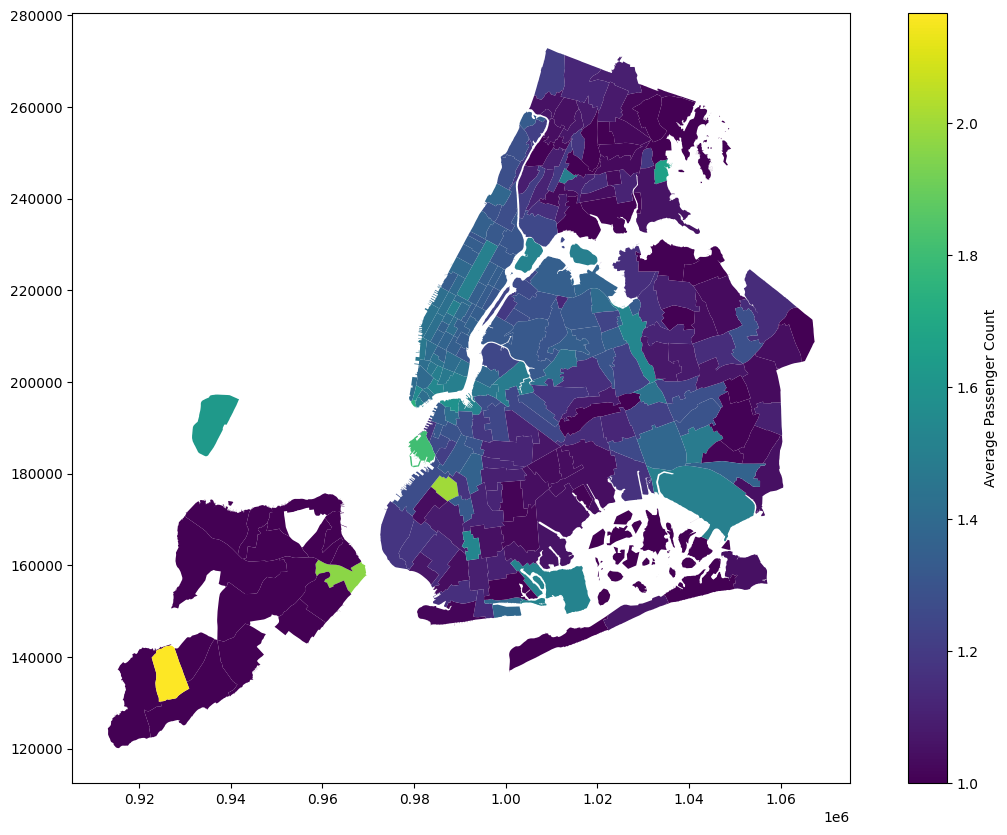

In [550]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = zones.merge(newdf.groupby('PULocationID')['passenger_count'].mean(), left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.plot(column='passenger_count', figsize=(15, 10), legend=True, cmap='viridis', legend_kwds={'label': "Average Passenger Count"})
zones_with_trips.head()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [519]:
# How often is each surcharge applied?

newdf[newdf['congestion_surcharge'] == 0]['zone'].unique()  


array(['LaGuardia Airport', 'JFK Airport', 'Central Harlem',
       'Yorkville West', 'Midtown Center', 'Upper West Side North',
       'Union Sq', 'Manhattan Valley', 'Sutton Place/Turtle Bay North',
       'Ridgewood', 'Red Hook', 'Kips Bay', 'East Harlem North',
       'Fort Greene', 'Upper East Side South', 'Midtown North',
       'Williamsburg (South Side)', 'Van Cortlandt Park', 'Astoria',
       'Morningside Heights', 'Gowanus', 'Greenwich Village North',
       'East Chelsea', 'Park Slope', 'East Harlem South',
       'Briarwood/Jamaica Hills', 'Brooklyn Heights', 'Elmhurst/Maspeth',
       'Clinton West', 'Washington Heights South', 'Clinton Hill',
       'Bloomingdale', 'East Concourse/Concourse Village',
       'Crown Heights North', 'Bay Ridge', 'Bushwick South',
       'Murray Hill', 'Parkchester', 'Stuyvesant Heights', 'Clinton East',
       'Central Park', 'Bushwick North', 'Central Harlem North',
       'Melrose South', 'Jackson Heights', 'Washington Heights North',
   

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the analysis 
1. Place more cabs in top 10 zones  the highest no. of pickups 
2. More cabs are needed during the peak hours of the day 1700 to 1900 hrs
3. Ensure adequate no of taxis available are available more on weekdays than weekends , and especially on wednesday and thursday
4. Based on no. of pickups per zone more cabs can be deployed in JFK Airport Area
5. Ensure credit card paymeny system is fully functional since majority of the payments happen through this mode
6. Optimize by reducing no. of taxis available in the night time and weekends
7. prirotize longer trips since they might result in higher tips

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Based on the analysis 
1. Place more cabs in top 10 zones  the highest no. of pickups 
2. More cabs are needed during the peak hours of the day 1700 to 1900 hrs
3. More cabs are needed during weekdays than weekends
4. Based on no. of pickups per zone more cabs can be deployed in JFK Airport Area

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. consider increasing price during peak hours and days , like 1700hrs to 1900 hrs and on weekdays
2. offer discounts during low demand periods like early morning or late night to atttract more customers
3. consider offerting packages or promotions for long duration or long distance trips as they result in higher tips
4 introduce loyalty programs for frequent taxi users